# EE2073 Lab 3
### Author: Nguyen Hoang Khanh (Kelvin)

#### Question 1. Fourier transform and spectra analysis

In [16]:
# communication channel setup
import serial
import serial.tools.list_ports
import numpy as np
import plotly.graph_objs as go

VID = 61525
PID = 38912

device = None

ports = serial.tools.list_ports.comports()
for p in ports:
    if p.vid == VID and p.pid == PID:
        try:
            device = serial.Serial(p.device)
        except serial.SerialException:
            print('Reconnect the controller unit.')
        
if device is None:
    raise Exception('No suitable device detected.')

In [2]:
# waveform generation
ns = 64
freq = 1000
amp = 1
offset = 0
cmd_gensin = 's100'
cmd_gensin += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gensin, 'utf-8'))

23

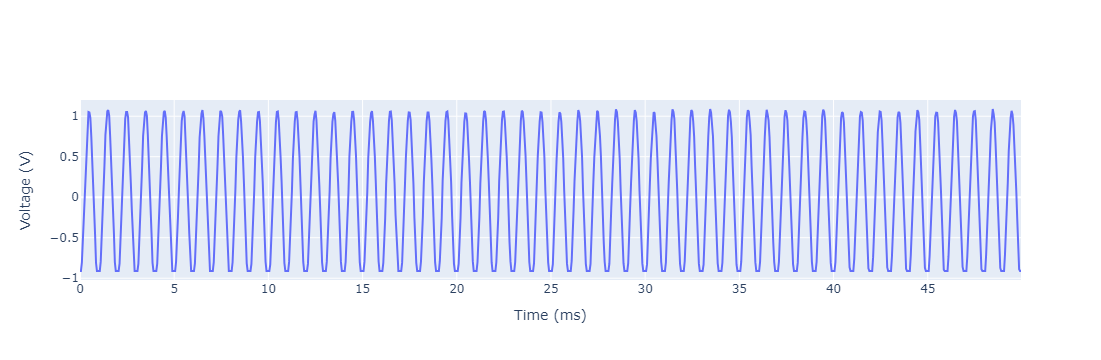

In [3]:
# waveform detection and plotting

fs = 20000
c2 = 0
gain1 = 138
dco1 = 130
c1 = 0
gain2 = 138
dco2 = 130

cmd_readosc = 'm1' + str(fs).zfill(6) + str(c1) + str(gain1).zfill(3) + \
              str(dco1).zfill(3) + str(c2) + str(gain2).zfill(3) + \
              str(dco2).zfill(3) + '\r'

bytedata = bytearray(4000)
device.reset_input_buffer()
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline()
device.readinto(bytedata)

data = np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))
t = np.arange(1000) / fs
sig = 2 * (data[0, :] - np.mean(data[0, :])) / np.ptp(data[0, :])  # adjust

fig = go.Figure()
fig.add_trace(go.Scatter(x=t * 1e3, y=sig))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (V)')

Close the connection

In [52]:
device.close()

Reopen the connection

In [47]:
device.open()

Analysis of spectral components

In [4]:
f = np.fft.rfftfreq(len(t), d=1/fs) # frequency array
spec = np.abs(np.fft.rfft(sig))/len(f) # spectral amplitudes
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

#### Question 1.1. Analyze the spectra of triangular and sawtooth waveforms

Generate triangular waveform on W1

In [5]:
# waveform generation
cmd_gentri = 's110'
cmd_gentri += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gentri, 'utf-8'))

23

Generate sawtooth waveform on W2

In [8]:
# waveform generation
cmd_gensaw = 's211'
cmd_gensaw += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gensaw, 'utf-8'))

23

Waveform detection and plotting of CH1

In [10]:
fs = 20000
c2 = 0
gain1 = 138
dco1 = 130
c1 = 0
gain2 = 138
dco2 = 130

cmd_readosc = 'm1' + str(fs).zfill(6) + str(c1) + str(gain1).zfill(3) + \
              str(dco1).zfill(3) + str(c2) + str(gain2).zfill(3) + \
              str(dco2).zfill(3) + '\r'

bytedata = bytearray(4000)
device.reset_input_buffer()
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline()
device.readinto(bytedata)

data = np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))
t = np.arange(1000) / fs
sig = 2 * (data[0, :] - np.mean(data[0, :])) / np.ptp(data[0, :])  # adjust

fig = go.Figure()
fig.add_trace(go.Scatter(x=t * 1e3, y=sig))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (V)')

Plotting of CH2

In [11]:
sig2 = 2 * (data[1, :] - np.mean(data[1, :])) / np.ptp(data[1, :])  # adjust

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=t * 1e3, y=sig2))
fig2.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (V)')

Analyze spectral components of triangular waveform

In [ ]:
f = np.fft.rfftfreq(len(t), d=1/fs) # frequency array

spec = np.abs(np.fft.rfft(sig))/len(f) # spectral amplitudes
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Analyze spectral components of sawtooth waveform

In [13]:
spec2 = np.abs(np.fft.rfft(sig2))/len(f) # spectral amplitudes
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=f*1e-3, y=spec2))
fig2.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Comment:\
Both spectral plots of triangular and sawtooth waveforms have highest amplitude at 1 kHz. This is reasonable because both signals are generated at 1 khz. However, the triangular signal has higher amplitude at 1 kHz (about 0.9 a.u.) compared to the sawtooth signal (about 0.7 a.u.). Moreover, the amplitudes at other integer-valued kHz frequencies of sawtooth signal are more noticeable than those of triangular signal. Perhaps there is more distortion in the sawtooth signal.

#### Question 2. Amplitude modulation and its influence on spectrum

Generate sinusoidal signal at W1

In [17]:
device.write(bytes(cmd_gensin, 'utf-8')) # use the command string created earlier

23

Detect waveform from CH1

In [18]:
device.reset_input_buffer()
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline()
device.readinto(bytedata)
data=np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))
t = np.arange(1000)/fs
sig = 2*(data[0, :] - np.mean(data[0, :]))/np.ptp(data[0, :])

Apply Amplitude Modulation (AM) to `sig` with modulation frequency f<sub>0</sub> = 100 Hz and modulation depth m = 0.5

In [19]:
mod_freq = 100
mod_depth = 0.5
mod = sig*(1 + mod_depth*np.sin(2*np.pi*mod_freq*t))
fig = go.Figure()
fig.add_trace(go.Scatter(x=t*1e3, y=mod))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (a.u.)')

Analyze the effect of modulation on the spectrum

In [22]:
# spectral analysis
spec_mod = abs(np.fft.rfft(mod))/len(f)
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec_mod))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Comment: sidebands are located at 0.1 kHz = 100 Hz around the main frequency

#### Question 2.1a. Time signal and spectrum of modulation with higher modulation frequency

Apply modulation and plot time signal with modulation frequency 900 Hz and modulation depth 0.5

In [32]:
mod_freq = 900
mod_depth = 0.5
mod = sig*(1 + mod_depth*np.sin(2*np.pi*mod_freq*t))
fig = go.Figure()
fig.add_trace(go.Scatter(x=t*1e3, y=mod))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (a.u.)')

Analyze spectrum

In [33]:
# spectral analysis
spec_mod = abs(np.fft.rfft(mod))/len(f)
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec_mod))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Comment: With higher modulation frequency, now the sidebands are located further away the main frequency, which are at ±0.9 kHz or ±900 Hz away.

#### Question 2.1b. Time signal and spectrum of modulation with higher modulation depth

Apply modulation and plot time signal with modulation frequency 100 Hz and modulation depth 0.7

In [34]:
mod_freq = 100
mod_depth = 0.7
mod = sig*(1 + mod_depth*np.sin(2*np.pi*mod_freq*t))
fig = go.Figure()
fig.add_trace(go.Scatter(x=t*1e3, y=mod))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (a.u.)')

Analyze spectrum

In [35]:
# spectral analysis
spec_mod = abs(np.fft.rfft(mod))/len(f)
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec_mod))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Comment: With higher modulation depth, the amplitude at sidebands become higher.

#### Question 2.2. Amplitude Modulation on triangular and sawtooth waveforms

Generate triangular waveform on W1

In [38]:
# waveform generation
cmd_gentri = 's110'
cmd_gentri += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gentri, 'utf-8'))

23

Generate sawtooth waveform on W2

In [39]:
# waveform generation
cmd_gensaw = 's211'
cmd_gensaw += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gensaw, 'utf-8'))

23

Detect waveforms from CH1 and CH2

In [40]:
device.reset_input_buffer()
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline()
device.readinto(bytedata)
data=np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))
t = np.arange(1000)/fs

Apply AM to triangular signal from CH1 with modulation frequency 100 Hz and modulation depth 0.5

In [41]:
sig1 = 2*(data[0, :] - np.mean(data[0, :]))/np.ptp(data[0, :])

mod_freq = 100
mod_depth = 0.5
mod1 = sig1*(1 + mod_depth*np.sin(2*np.pi*mod_freq*t))
fig = go.Figure()
fig.add_trace(go.Scatter(x=t*1e3, y=mod1))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (a.u.)')

Apply AM to sawtooth signal from CH2 with modulation frequency 100 Hz and modulation depth 0.5

In [43]:
sig2 = 2*(data[1, :] - np.mean(data[1, :]))/np.ptp(data[1, :])

mod_freq = 100
mod_depth = 0.5
mod2 = sig2*(1 + mod_depth*np.sin(2*np.pi*mod_freq*t))
fig = go.Figure()
fig.add_trace(go.Scatter(x=t*1e3, y=mod2))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (a.u.)')

Analyze spectrum of triangular signal

In [44]:
# spectral analysis
spec_mod1 = abs(np.fft.rfft(mod1))/len(f)
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec_mod1))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Analyze spectrum of sawtooth signal

In [45]:
# spectral analysis
spec_mod2 = abs(np.fft.rfft(mod2))/len(f)
fig = go.Figure()
fig.add_trace(go.Scatter(x=f*1e-3, y=spec_mod2))
fig.update_layout(xaxis_title='Frequency (kHz)', yaxis_title='Amplitude (a.u.)')

Comment:
- With the same modulation frequency and modulation depth, the modulated signals are only different at the signal wave.
- Modulated triangular signal still has the higher amplitude at 1 kHz compared to modulated sawtooth signal.
- Modulated sawtooth signal also has noticeable amplitude values at other integer-valued kHz frequencies.
- At each so-called noticeable amplitudes, there are sidebands located at ±0.1 kHz or ±100 Hz away.
- Ranking amplitude of sidebands around 1kHz of modulated signals: sinusoidal > triangular > sawtooth. So are the main amplitudes at 1kHz.

#### Open-ended questions

Generate signal at W1 with 8 samples per cycle

In [48]:
# waveform generation
ns = 8 # 8 samples per cycle
freq = 1000
amp = 1
offset = 0
cmd_gensin = 's100'
cmd_gensin += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gensin, 'utf-8'))

23

Measure the signal at CH1 with sampling rate of 100 kHz and plot the signal

In [49]:
# waveform detection and plotting

fs = 100000
c2 = 0
gain1 = 138
dco1 = 130
c1 = 0
gain2 = 138
dco2 = 130

cmd_readosc = 'm1' + str(fs).zfill(6) + str(c1) + str(gain1).zfill(3) + \
              str(dco1).zfill(3) + str(c2) + str(gain2).zfill(3) + \
              str(dco2).zfill(3) + '\r'

bytedata = bytearray(4000)
device.reset_input_buffer()
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline()
device.readinto(bytedata)

data = np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))
t = np.arange(1000) / fs
sig = 2 * (data[0, :] - np.mean(data[0, :])) / np.ptp(data[0, :])  # adjust

fig = go.Figure()
fig.add_trace(go.Scatter(x=t * 1e3, y=sig))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (V)')

Generate 20 kHz signal

In [50]:
# waveform generation
ns = 8 # 8 samples per cycle
freq = 20000
amp = 1
offset = 0
cmd_gensin = 's100'
cmd_gensin += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) + str(int(offset*100)).zfill(4) + '\r'

device.write(bytes(cmd_gensin, 'utf-8'))

23

Measure the signal at CH1 with sampling rate of 100 kHz and plot the signal

In [51]:
device.reset_input_buffer()
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline()
device.readinto(bytedata)

data = np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))
t = np.arange(1000) / fs
sig = 2 * (data[0, :] - np.mean(data[0, :])) / np.ptp(data[0, :])  # adjust

fig = go.Figure()
fig.add_trace(go.Scatter(x=t * 1e3, y=sig))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (V)')

Comment: The 1kHz signal with 8 samples per cycle is not sampled so accurately. Meanwhile, the 20 kHz signal (still with 8 samples per cycle) is sampled more accurately, but the result is still distorted at the peaks.